In [288]:
import pandas as pd
import numpy as np
import re
import sklearn
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline
import plotly
import plotly.offline as py
plotly.tools.set_credentials_file(username='soniakt23', api_key='FoAfF3pFQAZGkRqJHf43')
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score
import numpy as np  
import locale
from locale import atof
from xgboost import plot_importance

import warnings
warnings.filterwarnings('ignore')

# Going to use these 5 base models for the stacking
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import KFold;

# Preprocess Data

In [289]:
# Load in the train and test datasets
data = pd.read_csv('SAGAR_FINAL_DATA_10_CSV.csv')


In [290]:
#Make non numerical datatypes into float
data['backed'] = data['backed'].str.replace( ',','').astype(float)
data['comments'] = data['comments'].str.replace( ',', '').astype(float)

In [197]:
#Randomize data
df = shuffle(df)

#get rid of uneccessary rows in training and testing
df = df[df.state_canceled != 1]
df = df[df.state_suspended !=1]
df = df[df.state_live !=1]


#get rid of uneccessary columns in training and testing
drop_cols = ['user_profiles', 'state_failed', 'state_suspended', 'state_canceled', 'Unnamed: 0', 'pledged', 
            'usd_pledged', 'converted_pledged_amount', 'state_live']
df = df.drop(drop_cols, axis = 1)

print df.shape
#Drop na values
#df = df.dropna()

print df.shape

for column in df.columns:
    df[column] = df[column].fillna(df[column].median())

y = df['state_successful']
X = df.drop('state_successful', axis =1)



#Split dataset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)



(37064, 305)
(37064, 305)


In [81]:
print df.shape

(4021, 305)


In [63]:
df.describe()


,id,goal,deadline,created_at,launched_at,backed,comments,created,total_time,adventure,...,subcategory_spaces,subcategory_stationery,subcategory_taxidermy,subcategory_textiles,subcategory_typography,subcategory_video art,subcategory_weaving,subcategory_webcomics,subcategory_woodworking,subcategory_workshops
count,4.021000e+03,4.021000e+03,4.021000e+03,4.021000e+03,4.021000e+03,4021.000000,4021.000000,4021.000000,4.021000e+03,4021.000000,...,4021.0,4021.0,4021.0,4021.0,4021.0,4021.0,4021.0,4021.000000,4021.0,4021.0
mean,1.081489e+09,3.562879e+04,1.410730e+09,1.403932e+09,1.407991e+09,11.822542,50.372793,2.498722,2.739050e+06,0.013927,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.107187,0.0,0.0
std,6.212697e+08,1.577630e+06,4.541847e+07,4.613587e+07,4.550755e+07,43.476713,510.000895,3.538418,9.583753e+05,0.119306,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.309390,0.0,0.0
min,5.349160e+05,1.000000e+00,1.246421e+09,1.242847e+09,1.243123e+09,0.000000,0.000000,1.000000,8.640000e+04,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
25%,5.302994e+08,8.500000e+02,1.383336e+09,1.374514e+09,1.380629e+09,0.000000,0.000000,1.000000,2.588400e+06,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
50%,1.081741e+09,3.000000e+03,1.408311e+09,1.402911e+09,1.405564e+09,2.000000,1.000000,1.000000,2.592000e+06,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
75%,1.621427e+09,1.000000e+04,1.440963e+09,1.434447e+09,1.438371e+09,9.000000,18.000000,2.110000,2.821754e+06,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
max,2.146831e+09,1.000000e+08,1.508080e+09,1.505415e+09,1.505863e+09,1721.000000,18062.000000,74.000000,7.776000e+06,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0


In [64]:
X_train.shape
print type(y_train)

<class 'pandas.core.series.Series'>


In [65]:
print df.shape

(4021, 305)


# Train Models

In [67]:
# Some useful parameters which will come in handy later on
ntrain = X_train.shape[0]
ntest = X_test.shape[0]
SEED = 0 # for reproducibility
NFOLDS = 5 # set folds for out-of-fold prediction
kf = KFold(ntrain, n_folds= NFOLDS, random_state=SEED)

# Class to extend the Sklearn classifier
class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict_proba(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        return(self.clf.fit(x,y).feature_importances_)
    
    def estimators(self,x,y):
        return(self.clf.fit(x,y).estimators_)
    
# Class to extend XGboost classifer

In [68]:
def get_oof(clf, x_train, y_train, x_test, isXGB):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]
        
        if(isXGB):
            clf.fit(x_tr, y_tr)
            oof_train[test_index] = clf.predict_proba(x_te)
            temp = clf.predict_proba(x_test)
        else:
            clf.train(x_tr, y_tr)
            oof_train[test_index] = clf.predict(x_te)
            temp = clf.predict(x_test)

       
        
        oof_test_skf[i, :] = temp[:,1]
        
       

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [69]:
# Put in our parameters for said classifiers
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    #'n_estimators': 500,
     'warm_start': True, 
     #'max_features': 0.2,
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 0
}

# Extra Trees Parameters
et_params = {
    'n_jobs': -1,
    #'n_estimators':500,
    #'max_features': 0.5,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'verbose': 0
}

# AdaBoost parameters
ada_params = {
   # 'n_estimators': 500,
    'learning_rate' : 0.75
}

# Gradient Boosting parameters
gb_params = {
    #'n_estimators': 500,
     #'max_features': 0.2,
    'max_depth': 5,
    'min_samples_leaf': 2,
    'verbose': 0
}

# Support Vector Classifier parameters 
svc_params = {
    'kernel' : 'linear',
    'C' : 0.025
    }

In [70]:
# Create 5 objects that represent our 4 models
from xgboost import XGBClassifier
xgb = XGBClassifier()
rf = SklearnHelper(clf=RandomForestClassifier, seed=SEED, params=rf_params)
et = SklearnHelper(clf=ExtraTreesClassifier, seed=SEED, params=et_params)
ada = SklearnHelper(clf=AdaBoostClassifier, seed=SEED, params=ada_params)
gb = SklearnHelper(clf=GradientBoostingClassifier, seed=SEED, params=gb_params)
svc = SklearnHelper(clf=SVC, seed=SEED, params=svc_params)


In [71]:
x_train=X_train
y = y_train

In [72]:
y_train = y_train.ravel()
X_train = X_train.values
X_test = X_test.values

In [73]:
print X_train.shape

(3216, 304)


In [34]:
 #Create our OOF train and test predictions. These base results will be used as new features
et_oof_train, et_oof_test = get_oof(et, X_train, y_train, x_test) # Extra Trees
rf_oof_train, rf_oof_test = get_oof(rf,X_train, y_train, X_test, False) # Random Forest
ada_oof_train, ada_oof_test = get_oof(ada, X_train, y_train, X_test, False) # AdaBoost 
gb_oof_train, gb_oof_test = get_oof(gb,X_train, y_train, X_test, False) # Gradient Boost
xgb_oof_train, xgb_oof_test = get_oof(xgb, X_train, y_train, X_test, True) # xgb
svc_oof_train, svc_oof_test = get_oof(svc,X_train, y_train, X_test, False) # Support Vector Classifier

print("Training is complete")

Training is complete


In [45]:
ada_feature = ada.feature_importances(X_train, y_train)
gb_feature = gb.feature_importances(X_train,y_train)
rf_feature = rf.feature_importances(X_train, y_train)
xgb_feature = xgb.feature_importances_
svc_feature = svc.feature_importances(X_train, y_train)

In [46]:
ada_features=list(ada_feature)
gb_features = list(gb_feature)
rf_features = list(rf_feature)
xgb_features=  list(xgb_feature)
svc_features = list(svc_feature)

# Model Feature Importances

In [ ]:
estimators = ada.estimators(X_train, y_train)
print type(estimators)
std = np.std([ada_feature for tree in estimators],
             axis=0)
indices = np.argsort(ada_feature)[::-1]
x_axis = []
for index in indices:
    x_axis.append(x_train.columns[index])
    
x_axis = x_axis[:10]
# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], ada_feature[indices[f]]))

y_pos = np.arange(len(x_axis))
# Plot the feature importances of the forest


In [48]:
indices = np.argsort(ada_feature)[::-1]
x_axis = []
for index in indices:
    x_axis.append(x_train.columns[index])
    
x_axis = x_axis[:10]
# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], ada_feature[indices[f]]))

y_pos = np.arange(len(x_axis))
# Plot the feature importances of the for

Feature ranking:
1. feature 1 (0.100000)
2. feature 4 (0.100000)
3. feature 3 (0.060000)
4. feature 6 (0.060000)
5. feature 0 (0.040000)
6. feature 5 (0.040000)
7. feature 7 (0.040000)
8. feature 8 (0.040000)
9. feature 36 (0.020000)
10. feature 276 (0.020000)
11. feature 274 (0.020000)
12. feature 27 (0.020000)
13. feature 68 (0.020000)
14. feature 31 (0.020000)
15. feature 192 (0.020000)
16. feature 102 (0.020000)
17. feature 254 (0.020000)
18. feature 189 (0.020000)
19. feature 41 (0.020000)
20. feature 56 (0.020000)
21. feature 278 (0.020000)
22. feature 107 (0.020000)
23. feature 45 (0.020000)
24. feature 54 (0.020000)
25. feature 200 (0.020000)
26. feature 199 (0.020000)
27. feature 245 (0.020000)
28. feature 2 (0.020000)
29. feature 144 (0.020000)
30. feature 81 (0.020000)
31. feature 13 (0.020000)
32. feature 288 (0.020000)
33. feature 15 (0.020000)
34. feature 21 (0.020000)
35. feature 103 (0.000000)
36. feature 109 (0.000000)
37. feature 108 (0.000000)
38. feature 87 (0.00000

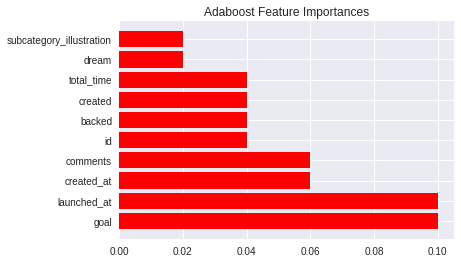

In [49]:
plt.figure()
indices = indices[:10]
plt.title("Adaboost Feature Importances")
plt.barh(range(len(x_axis)), ada_feature[indices],
       color="r", yerr=std[indices], align="center")
plt.yticks(range(len(x_axis)), x_axis)
#plt.xlim([-1, y_pos])
plt.show()

In [50]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [51]:
estimators = rf.estimators(X_train, y_train)
print type(estimators)
std = np.std([rf_feature for tree in estimators],
             axis=0)
indices = np.argsort(rf_feature)[::-1]
x_axis = []
for index in indices:
    x_axis.append(x_train.columns[index])
    
x_axis = x_axis[:10]
# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], rf_feature[indices[f]]))

y_pos = np.arange(len(x_axis))
# Plot the feature importances of the forest


<type 'list'>
Feature ranking:
1. feature 250 (0.171950)
2. feature 254 (0.148393)
3. feature 3 (0.144511)
4. feature 5 (0.128775)
5. feature 4 (0.063022)
6. feature 274 (0.047912)
7. feature 6 (0.029963)
8. feature 1 (0.025357)
9. feature 276 (0.022903)
10. feature 34 (0.022151)
11. feature 301 (0.019139)
12. feature 288 (0.017893)
13. feature 7 (0.014105)
14. feature 268 (0.011970)
15. feature 278 (0.008611)
16. feature 2 (0.008233)
17. feature 200 (0.007637)
18. feature 10 (0.007467)
19. feature 8 (0.007051)
20. feature 81 (0.006252)
21. feature 139 (0.005427)
22. feature 134 (0.005395)
23. feature 27 (0.005286)
24. feature 45 (0.004810)
25. feature 31 (0.004717)
26. feature 95 (0.004416)
27. feature 62 (0.003968)
28. feature 35 (0.003943)
29. feature 116 (0.003778)
30. feature 22 (0.002574)
31. feature 247 (0.002374)
32. feature 25 (0.002230)
33. feature 50 (0.001869)
34. feature 235 (0.001829)
35. feature 233 (0.001731)
36. feature 87 (0.001681)
37. feature 0 (0.001489)
38. featur

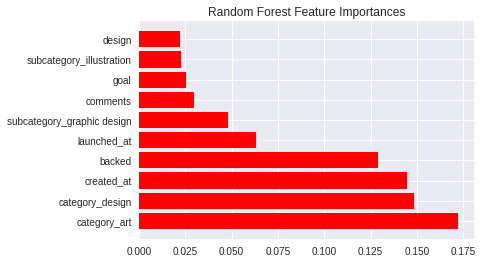

In [53]:
plt.figure()
indices = indices[:10]
plt.title("Random Forest Feature Importances")
plt.barh(range(len(x_axis)), rf_feature[indices],
       color="r", yerr=std[indices], align="center")
plt.yticks(range(len(x_axis)), x_axis)
#plt.xlim([-1, y_pos])
plt.show()

In [30]:
cols = x_train.columns.values
# Create a dataframe with features
feature_dataframe = pd.DataFrame( {'features': cols,
     'Random Forest feature importances': rf_features,
     #'Extra Trees  feature importances': et_features,
      'AdaBoost feature importances': ada_features,
   # 'Gradient Boost feature importances': gb_features,
    'XGB Boost feature importances': xgb_features
    })

In [31]:
# Create the new column containing the average of values

feature_dataframe['mean'] = feature_dataframe.mean(axis= 1) # axis = 1 computes the mean row-wise
feature_dataframe.head(3)



,AdaBoost feature importances,Random Forest feature importances,XGB Boost feature importances,features,mean
0,0.0,0.000403,0.015544,id,0.005316
1,0.1,0.017638,0.107081,goal,0.074906
2,0.0,0.032068,0.084629,deadline,0.038899


# Build Stacked Model DataFrame

In [33]:
base_predictions_train = pd.DataFrame( {'RandomForest': rf_oof_train.ravel(),
    # 'ExtraTrees': et_oof_train.ravel(),
     'AdaBoost': ada_oof_train.ravel(),
      'XGB Boost': xgb_oof_train.ravel()
    })
base_predictions_train.head()

,AdaBoost,RandomForest,XGB Boost
0,0.338189,0.389801,0.028347
1,0.661811,0.610199,0.971653
2,0.501012,0.594387,0.607857
3,0.498988,0.405613,0.392143
4,0.532609,0.604508,0.907953


# Determine Accuracies of Models

In [45]:
#Print Scoring
print ("ROC AUC Score :"  )
print roc_auc_score(y_test, rf_oof_test)
print roc_auc_score(y_test, ada_oof_test)
print roc_auc_score(y_test, xgb_oof_test)
print roc_auc_score(y_test, predictions[:,0])

ROC AUC Score :
0.870187952115
0.898676013705
0.919245796228
0.497146385475


In [34]:
x_train = np.concatenate(( ada_oof_train, xgb_oof_train, rf_oof_train), axis=1)
x_test = np.concatenate(( ada_oof_test, xgb_oof_test, rf_oof_test), axis=1)

In [35]:
print x_train

[[ 0.33818949  0.02834666  0.38980149]
 [ 0.66181051  0.97165334  0.61019851]
 [ 0.50101157  0.60785699  0.59438664]
 ..., 
 [ 0.50904184  0.71265376  0.54659868]
 [ 0.52014695  0.9226886   0.61290761]
 [ 0.47985305  0.07731141  0.38709239]]


In [36]:
print y_train

[1 0 0 ..., 0 1 0]


In [38]:
#Overlay XGBoost Model
gbm = XGBClassifier(
    #learning_rate = 0.02,
 n_estimators= 2000,
 max_depth= 4,
 min_child_weight= 2,
 #gamma=1,
 gamma=0.9,                        
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(x_train, y_train)
predictions = gbm.predict_proba(x_test)



In [42]:
print x_test.shape

(4763, 3)


In [ ]:
id = []
for i in range(49999,99999):
    id.append(i)
print predictions.shape
print len(id)

StackingSubmission = pd.DataFrame({ 
                            'Y': predictions[:,1], 'id': id })
StackingSubmission.to_csv("StackingSubmissionXGB.csv", index=False)